Downloading the preprocessed .csv file of images from google drive

In [ ]:
! pip install gdown

In [ ]:
import gdown; url = 'https://drive.google.com/uc?export=download&id=1lF-Y3XE-Cp2LacG8HDXLU8OWYE84x9dw' 
output = 'img.csv' 
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?export=download&id=1lF-Y3XE-Cp2LacG8HDXLU8OWYE84x9dw
To: /kaggle/working/img.csv
2.63GB [00:11, 224MB/s] 


'img.csv'

Importing the required modules

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from tqdm import tqdm
import tensorflow as tf
%matplotlib inline

Reading the .csv into dataframe and normlizing it by dividing it by 255

In [ ]:
df=pd.read_csv('img.csv')

In [ ]:
df=df/255

storing the images as numpy array reshaping it

In [ ]:
X=np.asarray(df)
X=X.reshape(18632,100,100,3)

In [ ]:
X.shape

(18632, 100, 100, 3)

Reading the training .csv

In [ ]:
df_train=pd.read_csv('../input/plant-pathology-2021-fgvc8/train.csv')

**Splitting the labels into 6 classes and encoding it**

In [ ]:
df_train["labels"]=df_train["labels"].apply(lambda x:x.split(" "))

In [ ]:
df_train['healthy']=0
df_train['scab']=0
df_train['complex']=0
df_train['rust']=0
df_train['frog_eye_leaf_spot']=0
df_train['powdery_mildew']=0


In [ ]:
for rown in range(0,len(df_train['labels'])):
    for i in df_train['labels'][rown]:
        if i == 'healthy':
            df_train['healthy'][rown]=1
        elif i == 'scab':
            df_train['scab'][rown]=1
        elif i == 'complex':
            df_train['complex'][rown]=1
        elif i == 'rust':
            df_train['rust'][rown]=1
        elif i == 'frog_eye_leaf_spot':
            df_train['frog_eye_leaf_spot'][rown]=1
        elif i == 'powdery_mildew':
            df_train['powdery_mildew'][rown]=1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykerne

In [ ]:
df_train[['healthy','scab','complex','rust','frog_eye_leaf_spot','powdery_mildew']].sum()

healthy               4624
scab                  5712
complex               2151
rust                  2077
frog_eye_leaf_spot    4352
powdery_mildew        1271
dtype: int64

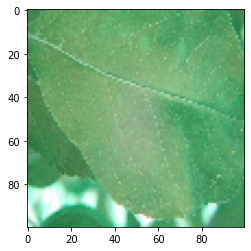

In [ ]:
plt.imshow(X[45])


Storing the labels as 6 dimensional Tensors

In [ ]:
y=np.asarray(df_train[['healthy','scab','complex','rust','frog_eye_leaf_spot','powdery_mildew']])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.25,random_state=42)

Creating the Architecture of CNN

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 16)        1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        5

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Training the model 

In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/10
219/219 [==============================] - 13s 28ms/step - loss: 0.5321 - accuracy: 0.2370 - val_loss: 0.4575 - val_accuracy: 0.3003
Epoch 2/10
219/219 [==============================] - 3s 13ms/step - loss: 0.4593 - accuracy: 0.2802 - val_loss: 0.4319 - val_accuracy: 0.2999
Epoch 3/10
219/219 [==============================] - 3s 13ms/step - loss: 0.4381 - accuracy: 0.3069 - val_loss: 0.4145 - val_accuracy: 0.3521
Epoch 4/10
219/219 [==============================] - 3s 14ms/step - loss: 0.4228 - accuracy: 0.3424 - val_loss: 0.3885 - val_accuracy: 0.4442
Epoch 5/10
219/219 [==============================] - 3s 14ms/step - loss: 0.3973 - accuracy: 0.4180 - val_loss: 0.3689 - val_accuracy: 0.4828
Epoch 6/10
219/219 [==============================] - 3s 13ms/step - loss: 0.3779 - accuracy: 0.4618 - val_loss: 0.3380 - val_accuracy: 0.5326
Epoch 7/10
219/219 [==============================] - 3s 14ms/step - loss: 0.3636 - accuracy: 0.4877 - val_loss: 0.3336 - val_accuracy: 0.540